[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/blog/blob/master/085_ml_tools/085_ml_tools.ipynb)

# Librerías de Python para ML

En el post anterior arrancamos con la serie sobre `Machine Learning`, en la que veremos múltiples algoritmos desarrollados durante las últimas décadas y que podemos usar como alternativa a las `redes neuronales` (*deep learning*), en algunos casos obteniendo mejores resultados (sobretodo en aquellos casos en los que no dispongamos de un dataset grande). Sin embargo, antes de entrar con los algoritmos y aplicaciones, vamos a hablar sobre el ecosistema de librerías existentes en `Python` para el `Machine Learning`, haciendo hincapié en aquellas más usadas por la comunidad y que también utilizaremos en esta serie.

![](https://github.com/juansensio/blog/blob/master/085_ml_tools/tools.png?raw=1)

En la imagen anterior puedes ver un resumen de las herramientas más usadas a día de hoy para `Machine Learning` con `Python`. Las herramientas rodeadas por un círculo rojo son las que usaremos en esta serie, en verde son herramientas para `deep learning` que no usaremos (pero hemos usado en otros posts). Las herramientas sin círculo no las usaremos, pero vale la pena conocerlas ya que pueden serte útiles para algunas aplicaciones.

En la base podemos encontrar `Python`, el lenguaje de programación base que todas las herramientas utilizan. Por encima encontramos herramientas como `Numpy`, para cálculo numérico, o `Jupyter`, para ejecutar nuestro código en `notebooks`. Por encima vemos herramientas basadas en `Numpy` como `Pandas`, para trabajar con datos tabulares, y `Matplotlib`, para generar gráficos en `Python`. Finalmente, en la última capa, encontramos `Scikit-Learn`, una de las librerías más utilizadas hoy en día para entrenar modelos de `Machine Learning`.

> En este blog ya hemos dedicado posts a todas estas librerías, excepto a `Scikit-Learn`. Te recomiendo especialmente, si no conoces estas librerías, mi curso gratuito de [Análisis de Datos](https://juansensio.com/da-yt) en las que aprenderas sobre ellas.

## Scikit-Learn

El resto de este post lo vamos a dedicar a introducir los conceptos más importantes de [Scikit-Learn](https://scikit-learn.org/stable/), y que desarrollaremos durante la serie. Puedes empezar por instalar la librería

```
pip install scikit-learn
```

Y seguir echando un vistazo a la [documentación](https://scikit-learn.org/stable/getting_started.html) y [ejemplos](https://scikit-learn.org/stable/auto_examples/index.html).

En cualquier proyecto de `Machine Learning` deberemos seguir una serie de pasos, los cuales describiremos al final de la serie. En lo referente al entrenamiento de modelos, normalmente encontramos tres pasos:

1. Preparar los datos
2. Entrenar modelos
3. Optimizar hyperparámetros

Existen otros pasos igual o más de importantes, pero (repito) los veremos más adelante ya que no involucran el uso de `Scikit-Learn`.

## Preparando los datos

Para este ejemplo vamos a utilizar un dataset para predicción de precios de casas.

In [1]:
import requests
import tarfile

URL = "https://mymldatasets.s3.eu-de.cloud-object-storage.appdomain.cloud/housing.tgz"
PATH = "housing.tgz"

def getData(url=URL, path=PATH):
  r = requests.get(url)
  with open(path, 'wb') as f:
    f.write(r.content)
  housing_tgz = tarfile.open(path)
  housing_tgz.extractall()
  housing_tgz.close()

In [2]:
getData()

In [3]:
import pandas as pd

data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Nuestro objetivo será el de predecir la variable `median_house_value` a partir del resto.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Como puedes observar tenemos variables continuas, categóricas y algunos *missing values*. Vamos a ver como podemos tratar estos aspectos con `Scikit-Learn`, aunque primero separaremos unas cuantas muestras para entrenar y el resto para evaluar nuestros modelos. Para ello vamos a utilizar la que es la funcionalidad probablemente más utilizada de la librería:

In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2) # 20% de los datos para test, 80% para entrenamiento

len(data), len(train), len(test)

(20640, 16512, 4128)

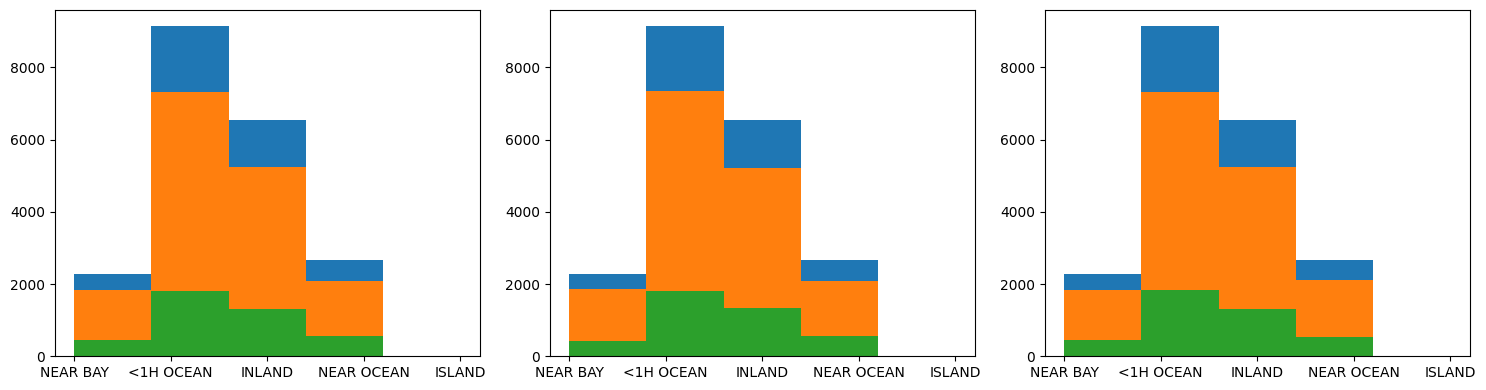

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,4))
ax = plt.subplot(1, 3, 1)
train, test = train_test_split(data, test_size=0.2)
ax.hist(data['ocean_proximity'], bins=len(data['ocean_proximity'].value_counts()))
ax.hist(train['ocean_proximity'], bins=len(data['ocean_proximity'].value_counts()))
ax.hist(test['ocean_proximity'], bins=len(data['ocean_proximity'].value_counts()))
ax = plt.subplot(1, 3, 2)
train, test = train_test_split(data, test_size=0.2, random_state=42) # siempre tendremos el mismo resultado
ax.hist(data['ocean_proximity'], bins=len(data['ocean_proximity'].value_counts()))
ax.hist(train['ocean_proximity'], bins=len(data['ocean_proximity'].value_counts()))
ax.hist(test['ocean_proximity'], bins=len(data['ocean_proximity'].value_counts()))
ax = plt.subplot(1, 3, 3)
train, test = train_test_split(data, test_size=0.2, random_state=69, stratify=data['ocean_proximity']) # balancear
ax.hist(data['ocean_proximity'], bins=len(data['ocean_proximity'].value_counts()))
ax.hist(train['ocean_proximity'], bins=len(data['ocean_proximity'].value_counts()))
ax.hist(test['ocean_proximity'], bins=len(data['ocean_proximity'].value_counts()))
plt.tight_layout()
plt.show()

In [8]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

Para tratar los *missing values* podemos usar un `Imputer`, que puede ser tan sencillo como cambiar los valores inexistentes por el valor promedio de la columna o un valor fijo hasta el uso de algoritmos más complejos que puedes encontrar en la documentación. En este caso solo tenemos una columna con *missing values* (`total_rooms`) de tipo numérico, pero si también tuviésemos *missing values* en variables categóricas deberíamos separarlas ya que querremos usar estrategias diferentes. De hecho, es buena idea separar variables numéricas de categóricas ya que las trataremos de diferente manera.

In [9]:
train_data, y_train = train.drop(['median_house_value'], axis=1), train['median_house_value'].copy()
test_data, y_test = test.drop(['median_house_value'], axis=1), test['median_house_value'].copy()

train_num = train_data.drop(['ocean_proximity'], axis=1)
train_cat = train_data[['ocean_proximity']]

In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") # definir imputer
imputer.fit(train_num) # calcular mediana
imputer.statistics_ # valores calculado

array([-118.5    ,   34.26   ,   29.     , 2127.     ,  434.     ,
       1167.5    ,  409.     ,    3.54025])

In [11]:
X_train_num = imputer.transform(train_num) # cambiar valores inexistentes por la mediana

X_train_num

array([[-1.1764e+02,  3.4040e+01,  2.1000e+01, ...,  2.5560e+03,
         4.8400e+02,  2.4716e+00],
       [-1.1925e+02,  3.4270e+01,  4.6000e+01, ...,  3.8200e+02,
         1.4300e+02,  3.5000e+00],
       [-1.1833e+02,  3.3930e+01,  3.8000e+01, ...,  4.1200e+02,
         1.1900e+02,  6.0718e+00],
       ...,
       [-1.1897e+02,  3.5380e+01,  4.2000e+01, ...,  1.0380e+03,
         2.9900e+02,  9.9510e-01],
       [-1.1934e+02,  3.4390e+01,  2.7000e+01, ...,  3.1400e+02,
         1.0600e+02,  2.4659e+00],
       [-1.2232e+02,  3.7570e+01,  4.2000e+01, ...,  2.3770e+03,
         5.8800e+02,  3.2891e+00]])

Aquí observamos el primer patrón que se repetirá constantemente al trabajar con `Scikit-Learn`, y es el uso de las funciones `fit` y `transform`. La primera la usaremos para calcular todo lo necesario para usar una clase (ya sea un imputer o un modelo) y, en el caso de objetos para procesado de datos, usaremos el `transform` para generar un array de `Numpy` listo para entrenar modelos, llevando a cabo todo el procesado necesario. Otro procesado muy común, que ayuda a algunos modelos a aprender mejor, es el escalado de los datos.


In [12]:
from sklearn.preprocessing import StandardScaler # también hay min-max, ...

scaler = StandardScaler() # mean y std
scaler.fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num)
X_train_num_scaled

array([[ 0.96771021, -0.74756456, -0.60269331, ...,  1.03927132,
        -0.03866464, -0.73393928],
       [ 0.16149343, -0.6394833 ,  1.37998002, ..., -0.95584437,
        -0.93592799, -0.19795272],
       [ 0.62218873, -0.79925559,  0.74552456, ..., -0.92831288,
        -0.99907849,  1.14243063],
       ...,
       [ 0.30170504, -0.11787378,  1.06275229, ..., -0.35382234,
        -0.52544974, -1.5034688 ],
       [ 0.11642541, -0.58309308, -0.12685171, ..., -1.0182491 ,
        -1.03328501, -0.73691003],
       [-1.37582676,  0.91124771,  1.06275229, ...,  0.87500006,
         0.23498753, -0.30787061]])

En cuanto a nuestra columna categórica, no podremos usarla para entrenar modelos (necesitamos valores numéricos). Para ello tenemos que usar un `Encoder`. Además, como puedes ver, puedes usar la función `fit_transform` para llevar a cabo ambas acciones a la vez.

In [13]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
X_train_cat = cat_encoder.fit_transform(train_cat)
X_train_cat

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [14]:
X_train_cat.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

Si bien podemos llevar a cabo todas las transformaciones que hemos visto una a una, es mucho más práctico (y reusable) definir `Pipelines`. De esta manera podremos ir desde los datos leído hasta los datos preparados de manera muy sencilla.

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

num_attribs = list(train_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
	("num", num_pipeline, num_attribs),
	("cat", OneHotEncoder(), cat_attribs),
])

In [16]:
X_train = full_pipeline.fit_transform(train_data)

X_train # contiene las variables numéricas y categóricas, sin missing values y todo escalado y codificado.

array([[ 0.96771021, -0.74756456, -0.60269331, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16149343, -0.6394833 ,  1.37998002, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.62218873, -0.79925559,  0.74552456, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.30170504, -0.11787378,  1.06275229, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.11642541, -0.58309308, -0.12685171, ...,  0.        ,
         0.        ,  1.        ],
       [-1.37582676,  0.91124771,  1.06275229, ...,  0.        ,
         0.        ,  1.        ]])

In [17]:
X_test = full_pipeline.transform(test_data) # ojo ! aquí no hacemos fit :) sólo transform

X_test

array([[-0.07386178,  0.54941047, -0.44407944, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.61718117, -0.73816619,  1.85582162, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.5671056 , -0.66297923,  0.58691069, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.70230965, -0.74756456,  1.37998002, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.09790671, -0.73816619, -0.91992104, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2055698 ,  0.7890689 ,  0.42829682, ...,  0.        ,
         0.        ,  0.        ]])

El uso de `Pipelines` es muy potente, ya que puedes incluir tus modelos también y exportarlos en archivos de manera que los puedas compartir o usar en diferentes entornos (por ejemplo, para preparar los datos en producción de la misma manera que en entrenamiento).

## Enternando modelos

Una vez tenemos los datos preparados, ya estamos listos para entrenar modelos. `Scikit-learn` trae muchísimos modelos implementados y cada uno necesitará unos parámetros diferentes. En esta serie veremos muchos de estos algoritmos, pero todos ellos implementan una interfaz similar basados, de nuevo, en la función `fit` para entrenar el modelo.

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

Una vez el modelo ha sido entrenado, podemos sacar predicciones con la función `predict` (recuerda pasarle los datos preparados).

In [19]:
preds = lin_reg.predict(X_test)
preds

array([108292.22741445, 379888.92139725, 213135.75783887, ...,
       215265.23261004, 122562.39714544, 318906.32084628])

`Scikit-Learn` también implementa multitud de `métricas` que podemos usar para evaluar nuestros modelos.

In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

preds = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, preds)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

71008.96666632878

Vamos a probar otro modelo.

In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [22]:
predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

67180.66674963046

Parece que da un poco mejor 🤗 En futuros posts veremos más modelos y cómo mejorarlos.

## Optimización de hyperparámetros

A la hora de entrenar modelos de `Machine Learning` podemos usar multitud de `hyperparámteros`, el conjunto de todos aquellos parámetros que pueden afectar al entrenamiento del modelo y a su desempeño final. La forma más utilizada de optimización de hyperparámetros probar muchos y quedarse con los mejores 😝 siguiendo diferentes estrategias. Por ejemplo, podemos probar diferentes valores de un conjunto determinado.

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
	# 12 (3×4) combinaciones
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
	# 6 (2×3) combinaciones
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# entrenar con 5 folds un total de (12+6)*5=90 entrenamientos
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [24]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [25]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [26]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63339.55618309705 {'max_features': 2, 'n_estimators': 3}
55291.09598702181 {'max_features': 2, 'n_estimators': 10}
52587.09831900864 {'max_features': 2, 'n_estimators': 30}
59951.99892011206 {'max_features': 4, 'n_estimators': 3}
52764.16418304784 {'max_features': 4, 'n_estimators': 10}
50280.79794899106 {'max_features': 4, 'n_estimators': 30}
58646.287306317055 {'max_features': 6, 'n_estimators': 3}
51933.65975704695 {'max_features': 6, 'n_estimators': 10}
49723.11534451858 {'max_features': 6, 'n_estimators': 30}
58639.440267951104 {'max_features': 8, 'n_estimators': 3}
51947.43577366441 {'max_features': 8, 'n_estimators': 10}
49959.65853502058 {'max_features': 8, 'n_estimators': 30}
62660.85578333314 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53682.43657349913 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60016.802813202616 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53224.05340560518 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [27]:
best_model = grid_search.best_estimator_
preds = best_model.predict(X_test)
final_mse = mean_squared_error(y_test, preds)
final_rmse = np.sqrt(final_mse)
final_rmse

49214.84552444808

## Resumen

En este post hemos visto las herramientas más usadas en el ecosistema `Python` para `Machine Learning`. Herramientas como `Python`, `Numpy`, `Pandas` o `Matplotlib` ya las hemos visto en posts anteriores. Aquí, nos hemos centrado en la librería `Scikit-Learn`, probablemente la más usada a día de hoy para entrenar modelos de ML en `Python`. Hemos visto como podemos usar la funcionalidad de la librería para preparar nuestros datos, creando `Pipelines` reutilizables, entrenar modelos y optimizar sus hyperparámetros para obtener los mejores modelos posibles. En los siguientes posts entraremos en detalle en diferentes modelos que encontramos en la librería con ejemplos de aplicación.